In [1]:
import gzip
import glob
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbilr.reader import MatrixReader

runs = ["20220708_GM12878", "20220708_GM12878R2", "20220817_HG001", "20220915_P1", "20220916_P1",  "20220916_P2"]

# Trimming

In [5]:
rows = []
for run in runs:
    for path in sorted(glob.glob("../../1_NanoStrandSeq/results/demux/trimmed/%s/*.log" % run)):
        row = []
        for line in open(path):
            if "%" in line:
                v = int(line.split()[-2])
                row.append(v)
        rows.append(row)

In [6]:
d = pd.DataFrame(rows, columns=["Total", "TooShort", "NoLinker", "IsChimeric", "Pass"])
d = d[d["Total"] >= 100000]
d = d.divide(d["Total"], axis=0)
d = d[["NoLinker", "IsChimeric", "Pass"]]
print(len(d))
d

473


,NoLinker,IsChimeric,Pass
0,0.143132,0.023558,0.829037
1,0.126565,0.018000,0.854619
2,0.142436,0.030792,0.825500
3,0.117952,0.023466,0.858405
4,0.098415,0.015189,0.886372
...,...,...,...
510,0.048994,0.011953,0.939042
511,0.048174,0.017257,0.934552
512,0.046722,0.015650,0.937618
513,0.049746,0.039739,0.910491


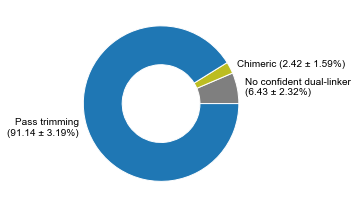

In [7]:
means = d.mean(axis=0) * 100
stds = d.std(axis=0) * 100

labels = [
    "No confident dual-linker\n(%.2f ± %.2f%%)" % (means[0], stds[0]),
    "Chimeric (%.2f ± %.2f%%)" % (means[1], stds[1]),
    "Pass trimming\n(%.2f ± %.2f%%)" % (means[2], stds[2]),
]

plt.figure(figsize=(5, 3))
plt.pie(means, radius=1,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        colors=["C7", "C8", "C0"], labels=labels)
plt.tight_layout()
plt.savefig("figures/trimming_summary.pdf", dpi=300)